# Homework 2: Decision Trees
Due 10/21 at 11:59pm

**Note: There are two notebooks in Homework 2. Please also complete the other notebook `HW2_Linear_Models.ipynb` for full credit on this assignment.**

### Q4 : Decision Trees

Download the dataset from this website : https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
The data is a csv file with the following columns:

__age__: continuous.

__workclass__: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

__fnlwgt__: continuous.

__education__: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

__education-num__: continuous.

__marital-status__: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

__occupation__: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

__relationship__: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

__race__: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

__sex__: Female, Male.

__capital-gain__: continuous.

__capital-loss__: continuous.

__hours-per-week__: continuous.

__native-country__: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

__target__: >50K, <=50K.

1. Read the data into a dataframe and assign column names

In [2]:
#code here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

col_names = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship",
            "race","sex","capital-gain","capital-loss","hours-per-week","native-country","target"]

df = pd.read_csv("adult.data",names=col_names,na_values=' ?')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


2. Plot % of missing values in each column. Would you consider dropping any columns? Assuming we want to train a decision tree, would you consider imputing the missing values? If not, why?

'\nI will not drop the columns since the percentage of missing values are relatively small for this data set. Also, I will not\nconsider imputing the missing values since the decision tree will treat missing values as another category in the task. Imputing\nthese missing values will not help in this case.\n'

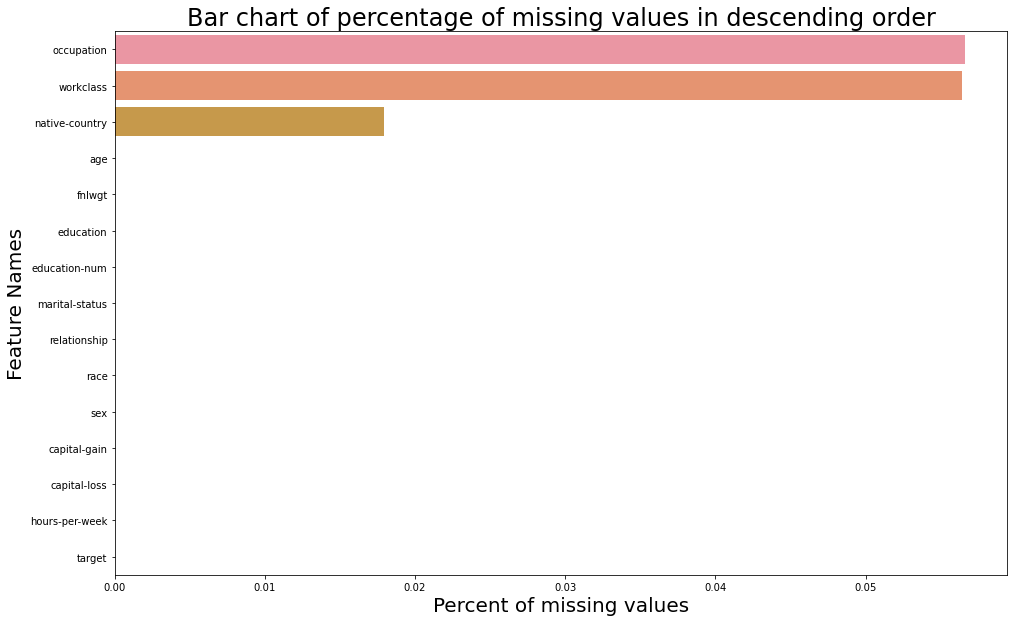

In [3]:
#code here
import seaborn as sns
n = df["age"].count()
percent_missing = df.isna().sum()/n
percent_missing.sort_values(ascending=False)
col_names2 = ["occupation","workclass","native-country","age","fnlwgt","education","education-num","marital-status",
              "relationship","race","sex","capital-gain","capital-loss","hours-per-week","target"]
plt.figure(figsize = (16,10))
sns.barplot(y = col_names2, x = percent_missing.sort_values(ascending=False))
plt.xlabel('Percent of missing values', fontsize=20)
plt.ylabel('Feature Names', fontsize=20)
plt.title('Bar chart of percentage of missing values in descending order', fontsize=24)
"""
I will not drop the columns since the percentage of missing values are relatively small for this data set. Also, I will not
consider imputing the missing values since the decision tree will treat missing values as another category in the task. Imputing
these missing values will not help in this case.
"""

3. Pick 3 categorical features and for each categorical feature, plot side-by-side bars (horizontal or vertical) of class distribution for each category. 

<Figure size 1296x864 with 0 Axes>

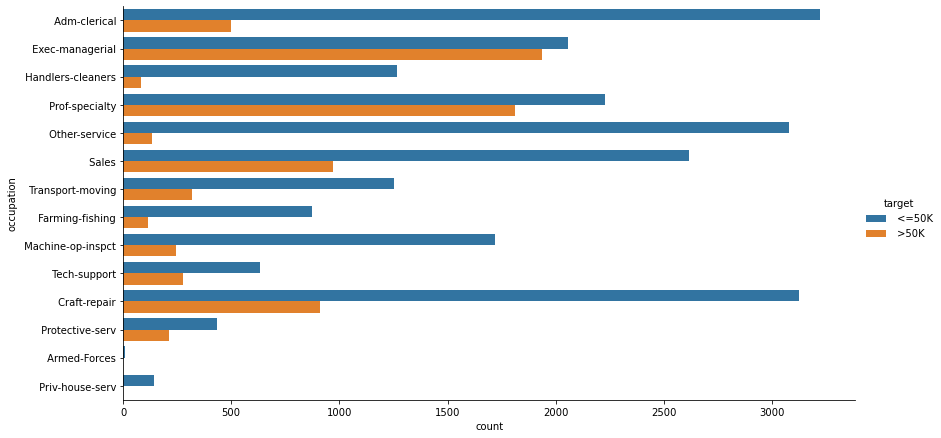

In [4]:
#code here
df2 = df.dropna()
categorical_fea = ["occupation","education","sex"]

plt.figure(figsize=(18, 12))
sns.catplot(y = df2["occupation"], kind="count", hue="target", data = df2,height=6, aspect=2)

<Figure size 1296x864 with 0 Axes>

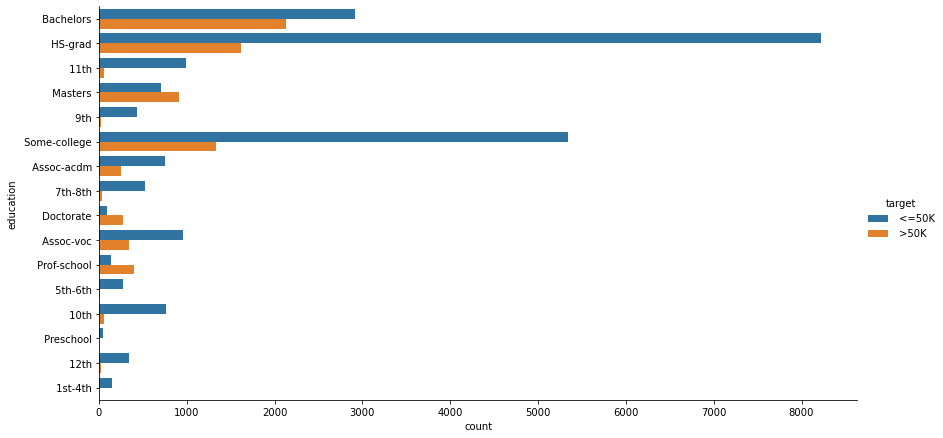

In [149]:
plt.figure(figsize=(18, 12))
sns.catplot(y = df2["education"], kind="count", hue="target", data = df2,height=6, aspect=2)

<Figure size 1296x864 with 0 Axes>

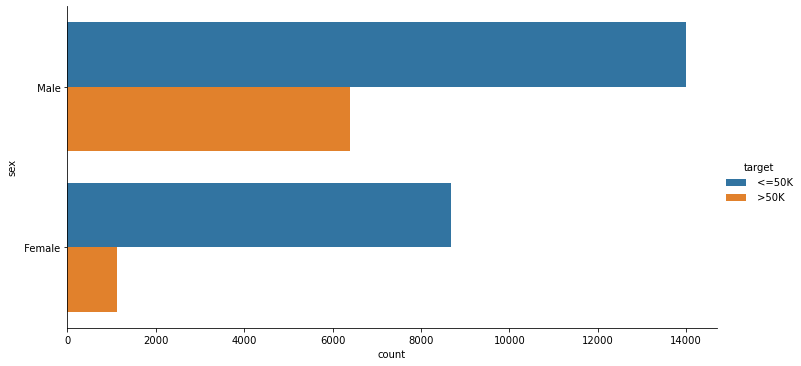

In [151]:
plt.figure(figsize=(18, 12))
sns.catplot(y = df2["sex"], kind="count", hue="target", data = df2,height=5, aspect=2)

4. Split the dataset into development and test datasets using 80/20 ratio

In [5]:
df2["target"].value_counts()
## Since this is a highly unbalanced data set, I will use stratified split.

 <=50K    22654
 >50K      7508
Name: target, dtype: int64

In [9]:
#code here
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
X = df2.drop(columns=['target'])
y = df2["target"]
enc = OrdinalEncoder(categories = [[" <=50K"," >50K"]])
y = enc.fit_transform(y.to_numpy().reshape(-1,1))
X_dev, X_test, y_dev, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2021)


5. Fit a Decision Tree on the development data until all leaves are pure. What is the performance of the tree on development data and test data?

In [10]:
#code here
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
ohe_features = ["workclass","marital-status","relationship","race","sex","education","native-country"]
te_features = ["occupation"]
num_features = ["age", "fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]
mixed_df = df2[ohe_features+te_features+num_features]
target = df2["target"]
preprocess = make_column_transformer((StandardScaler(), num_features), 
                                    (OneHotEncoder(handle_unknown = "ignore"),ohe_features),
                                     (TargetEncoder(handle_unknown = "ignore"),te_features),
                                        remainder = "passthrough")

pipe = Pipeline(steps=[("preprocess", preprocess), ("classifier",DecisionTreeRegressor(random_state=0))])
pipe.fit(X_dev,y_dev)
print(pipe.score(X_dev,y_dev))
print(pipe.score(X_test,y_test))

0.9998891606655222
0.007141511604772721


6. Visualize the trained tree

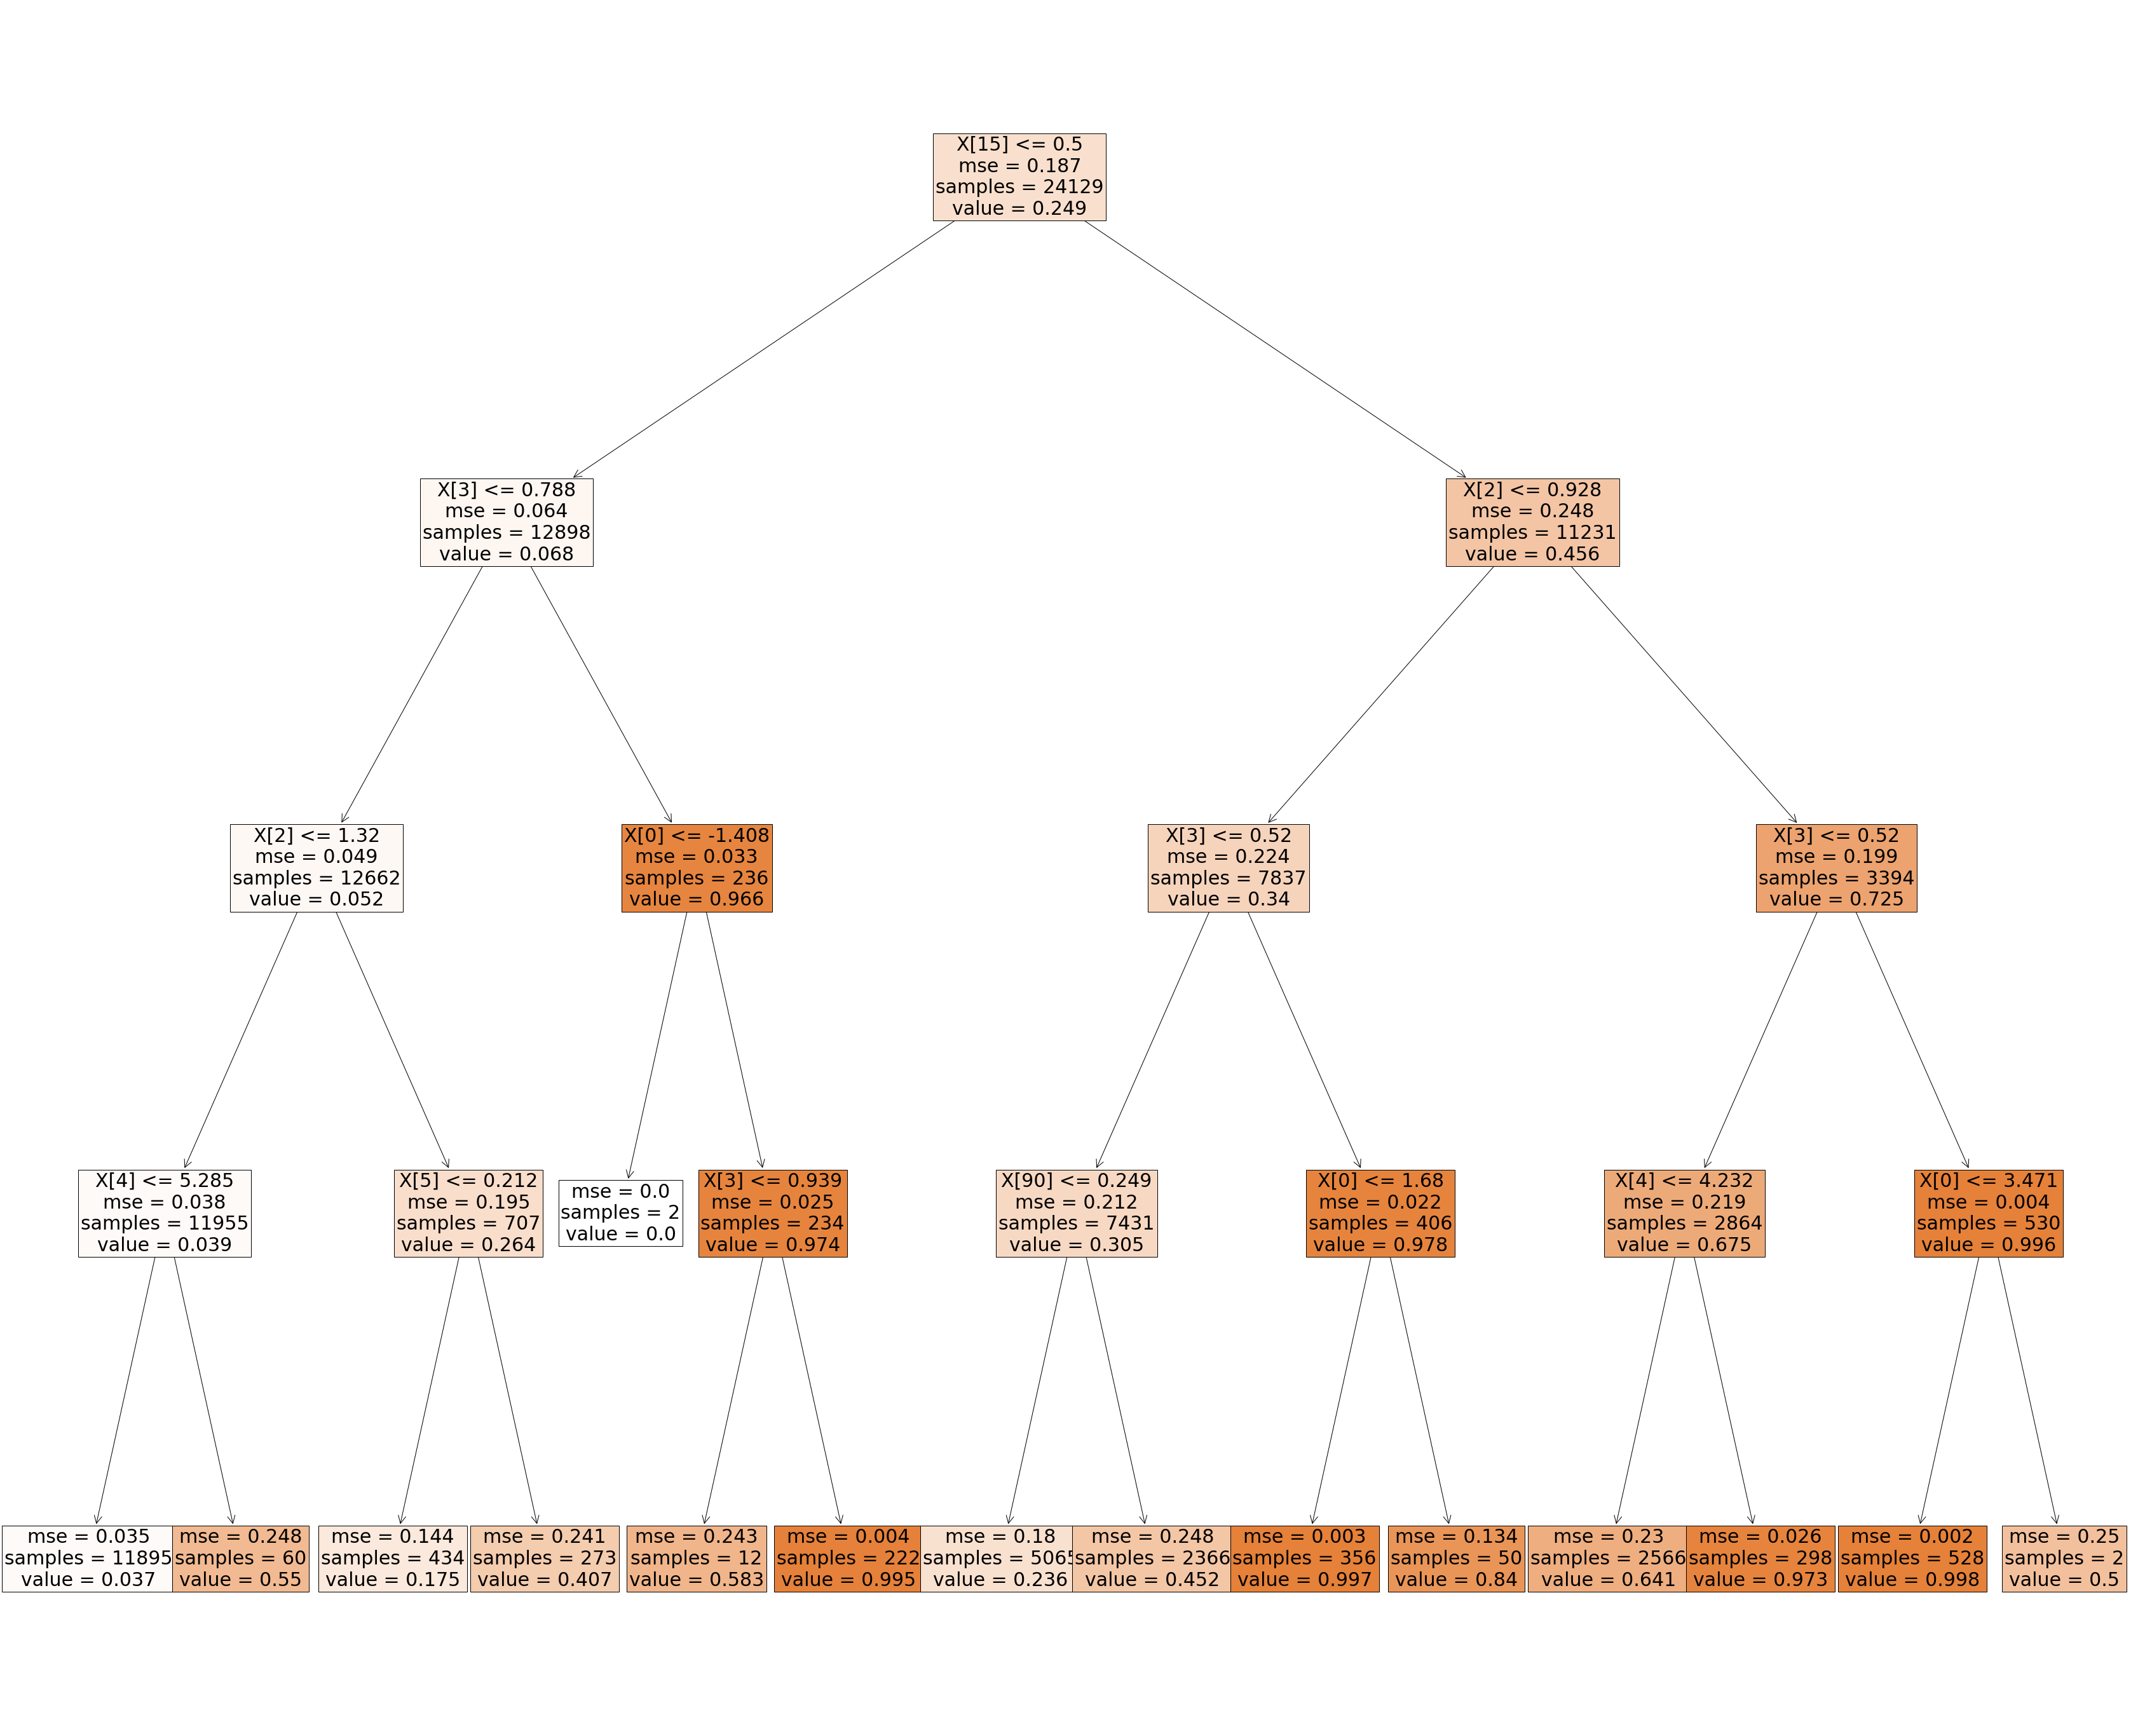

In [86]:
from sklearn import tree
import graphviz
## train another smaller tree for visualization
pipe = Pipeline(steps=[("preprocess", preprocess), ("classifier",DecisionTreeRegressor(max_depth = 4, random_state=5))])
pipe.fit(X_dev,y_dev)
text_representation = tree.export_text(pipe['classifier'])
text_representation
fig = plt.figure(figsize=(60,50))
_ = tree.plot_tree(pipe['classifier'], 
                   filled=True,fontsize=30)

7. Prune the tree using one of the techniques discussed in class and evaluate the performance on the test set again.

In [88]:
from sklearn.model_selection import GridSearchCV
pipe2 = make_pipeline(preprocess, GridSearchCV(DecisionTreeRegressor(random_state=5), 
                                               param_grid = [{"max_depth":[2,4,6,8,10,12],
                                                              'min_samples_split': [2,3,4],
                                                              'min_samples_leaf': [1,2]}], 
                                                               return_train_score = True))
pipe2.fit(X_dev,y_dev)
print(f"Test score:", pipe2.score(X_test,y_test))
## We can see the test score largely increased comparing to part 5, where we reached maximum depth.

Test score: 0.46038756835739236


8. List the top 3 most important features for this trained tree? How would you justify these features being the most important? 

C:\Users\Ivan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


'\nFrom the graph, it seems that the 3 most important features are x0_Not-in-family, x0_Private, and x0_Self-emp-inc. \nWe can justify these features by plotting the tree and see if these features appear to be the top 3 roots for the whole tree.\n'

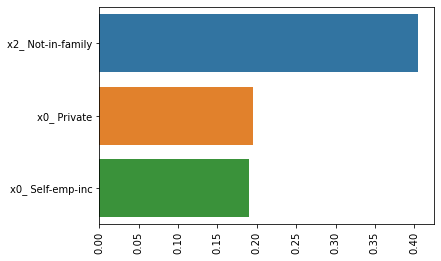

In [128]:
#code here

grid_search_results = pipe2.named_steps["gridsearchcv"]
best_tree = grid_search_results.best_estimator_

ohe_feature_names = preprocess.named_transformers_["onehotencoder"].get_feature_names().tolist()
te_features_names = preprocess.named_transformers_["targetencoder"].get_feature_names()
feature_names = ohe_feature_names + te_features_names + num_features
feat_imps = zip(feature_names, best_tree.feature_importances_)
feats,imps = zip(*(sorted(list(filter(lambda x:x[1] != 0, feat_imps)), key = lambda x: x[1], reverse = True)))
ax = sns.barplot(list(imps[:3]),list(feats[:3]))
ax.tick_params(axis = "x", rotation = 90)
'''
From the graph, it seems that the 3 most important features are x0_Not-in-family, x0_Private, and x0_Self-emp-inc. 
We can justify these features by plotting the tree and see if these features appear to be the top 3 roots for the whole tree.
''' 


### Q5: Random Forests

Let's use the same dataset and the splits created in Q3.

1. Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Does this perform better than Decision Tree on the test dataset (compare to results in Q 4.5)?

In [44]:
#code here
from sklearn.ensemble import RandomForestRegressor
pipe_rf = make_pipeline(preprocess, RandomForestRegressor(random_state = 100))
pipe_rf.fit(X_dev, y_dev.ravel())
print(f"Random Forest Regressor Score:", pipe_rf.score(X_test, y_test.ravel()))

Random Forest Regressor Score: 0.446404504669918


2. Does all trees in the trained random forest model have pure leaves? How would you verify this?

In [96]:
#code here
print(f"Train score:", pipe_rf.score(X_dev, y_dev.ravel()))

## Since the train score is not very close to 1, not all trees in the trained random forest have pure leaves.

Train score: 0.9216290113489736


3. Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?

In [105]:
'''
I will choose to tune the maximum depth and number of estimators since they are the maximum depth somewhat prevent overfitting by
trading impurity of the leaves while number of estimators are one of the most commonly used hyperparameter for tuning in random 
forest.
'''

pipe_rf = make_pipeline(preprocess, GridSearchCV(RandomForestRegressor(random_state=5,oob_score = True,n_jobs = -1), 
                                               param_grid = [{"max_depth":[10,20,30],
                                                              "n_estimators" : [100,200,300]}], 
                                                               return_train_score = True))


pipe_rf.fit(X_dev,y_dev.ravel())
grid_search_results = pipe_rf.named_steps["gridsearchcv"]
print(f"Best score:", grid_search_results.best_score_)
print(f"Best params:", grid_search_results.best_params_)
print(f"Test score:", pipe_rf.score(X_test,y_test.ravel()))
## We can see that the test score largely increases comparing to Q5.1

Best score: 0.4805154737670095
Best params: {'max_depth': 10, 'n_estimators': 300}
Test score: 0.48176847514562104


4. Now, assume you had to choose upto 10 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift? 

In [21]:
'''
I will choose to tune number of estimators and number of features to consider at each split. For number of estimators
(number of trees to built),I will starting from 100 to 1100 with incremental of 100. 
For number of features, I will choose the square root of the number of features for this task since it is for classification. 
I will choose other values starting from 2 with an increment of 2 to 18.
If the final best results chooses one of the largest or smallest values in these values. 
I will try to rerun the process and increase or decrease the maximum or minimum of the values I chosed before correspondingly. 
'''


5. Perform model selection using the chosen values for the hyperparameters. Select 3 values for each of the hyperparameters and use cross-validation to find the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q5.1?

In [116]:
%%time
pipe_rf = make_pipeline(preprocess, GridSearchCV(RandomForestRegressor(random_state=5,oob_score = True,n_jobs = -1,
                                                                       warm_start = True), 
                                               param_grid = [{'n_estimators': [100,150,200],
                                                               'max_features': [5,"sqrt",10,],
                                                               'max_depth': [5,10,20],
                                                               'min_samples_split': [2, 3, 4],
                                                               'min_samples_leaf': [1, 2, 3]}], 
                                                               return_train_score = True))
pipe_rf.fit(X_dev,y_dev.ravel())
grid_search_results = pipe_rf.named_steps["gridsearchcv"]
print(f"Best score:", grid_search_results.best_score_)
print(f"Best params:", grid_search_results.best_params_)
print(f"Test score:", pipe_rf.score(X_test,y_test.ravel()))


[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.1s
[Pipeline] ...... (step 2 of 2) Processing gridsearchcv, total=17.4min
Best score: 0.4759816652209027
Best params: {'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 150}
Test score: 0.4790062349882549
Wall time: 17min 24s


6. Can you find the top 3 most important features from the model trained in Q5.5? How do these features compare to the important features that you found from Q4.8? If they differ, which feature set makes more sense?

C:\Users\Ivan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


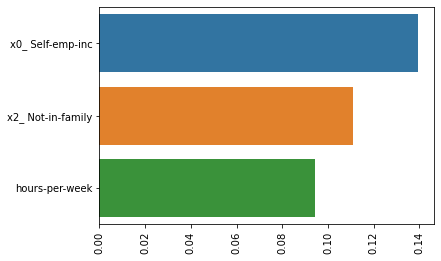

In [117]:
#code here
best_rf = grid_search_results.best_estimator_
ohe_feature_names = preprocess.named_transformers_["onehotencoder"].get_feature_names().tolist()
te_features_names = preprocess.named_transformers_["targetencoder"].get_feature_names()
feature_names = ohe_feature_names + te_features_names + num_features
feat_imps = zip(feature_names, best_rf.feature_importances_)
feats,imps = zip(*(sorted(list(filter(lambda x:x[1] != 0, feat_imps)), key = lambda x: x[1], reverse = True)))
ax = sns.barplot(list(imps[:3]),list(feats[:3]))
ax.tick_params(axis = "x", rotation = 90)
'''
The top 3 most important features has been changed to x0_self-emp-inc, x2_Not-in-family and hours-per-week becomes the three
most important features, which is different from what we see in Q4.8. And this feature set makes more sense since decision tree
will mostly likely to be overfitted for the train data set and the whole can change significantly with minor change of the input
hyperparameters.
'''

### Q6: Gradient Boosted Trees

Let's use the same dataset and the splits created in Q3.

1. Choose three hyperparameters to tune GradientBoostingClassifier and HistGradientBoostingClassifier on the development dataset using 10-fold cross validation. Report on the time taken to do model selection for both the models. Also, report the performance of the test dataset from the optimal models.

In [162]:
%%time
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
pipe_gb = make_pipeline(preprocess, GridSearchCV(GradientBoostingClassifier(random_state=5,warm_start = True), 
                                                 cv=KFold(n_splits=10),
                                                    param_grid = [{'n_estimators': [100,200,300],
                                                               'max_features': [5,"sqrt",10],
                                                               'learning_rate': [0.05,0.1,0.15]
                                                               }], n_jobs = -1,
                                                               return_train_score = True))
pipe_gb.fit(X_dev,y_dev.ravel())
print(f"Gradient Boosting Regressor Score", pipe_gb.score(X_test,y_test.ravel()))

Gradient Boosting Regressor Score 0.8652411735454998
Wall time: 56.3 s


In [130]:
grid_search_results = pipe_gb.named_steps["gridsearchcv"]
print(f"Gradient Boosting Regressor Score", pipe_gb.score(X_test,y_test))
print(f"Best score:", grid_search_results.best_score_)
print(f"Best params:", grid_search_results.best_params_)

Gradient Boosting Regressor Score 0.8652411735454998
Best score: 0.8650999389019814
Best params: {'learning_rate': 0.15, 'max_features': 'sqrt', 'n_estimators': 300}


In [160]:
%%time
#HistGradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.base import TransformerMixin

class DenseTransformer(TransformerMixin):
    def fit(self,X, y= None, **fit_params):
        return self
    
    def transform(self, X, y= None, **fit_params):
        return X.todense()

pipe_hgb = make_pipeline(preprocess, DenseTransformer(), GridSearchCV(HistGradientBoostingClassifier(random_state=5,
                                                                                                     warm_start = True), 
                                                 cv=KFold(n_splits=10),
                                                    param_grid = [{'max_depth': [10,15,20],
                                                               'min_samples_leaf': [2,3,4],
                                                               'learning_rate': [0.05,0.1,0.15]
                                                               }], n_jobs = -1,
                                                               return_train_score = True))
pipe_hgb.fit(X_dev,y_dev.ravel())

Hist Gradient Boosting Regressor Score 0.8690535388695508
Wall time: 2min 50s


In [134]:
grid_search_results = pipe_hgb.named_steps["gridsearchcv"]
print(f"Hist Gradient Boosting Regressor Score", pipe_hgb.score(X_test,y_test))
print(f"Best score:", grid_search_results.best_score_)
print(f"Best params:", grid_search_results.best_params_)

'''
HistGradientBoostingClassifier takes slightly longer time to run since we have selected different hyperparameters for tuning, in reality, I believe it will take much less time than gradient boosting. Meanwhile, we can see it has a slightly higher test score comparing to Gradient Boosting.
'''

Hist Gradient Boosting Regressor Score 0.8690535388695508
Best score: 0.8697001248763779
Best params: {'learning_rate': 0.1, 'max_depth': 20, 'min_samples_leaf': 4}


'\nHistGradientBoostingClassifier takes slightly longer time to run since we have selected different hyperparameters for tuning, in reality, I believe it will take much less time than gradient boosting. Meanwhile, we can see it has a slightly higher test score comparing to Gradient Boosting.\n'

2. Train an XGBoost model by tuning 3 hyperparameters using cross-validation. Report on the optimal hyperparameters and the time to train the model. Compare the performance of the trained XGBoost model on test dataset against the performances obtained from 6.1 

In [202]:
%%time
from xgboost import XGBRegressor
pipe_xgb = make_pipeline(preprocess, GridSearchCV(XGBRegressor(random_state=5),cv=KFold(n_splits=10),
                                                    param_grid = [{'n_estimators': [100,200,300],
                                                                    'max_depth': [5,10,15],
                                                                   'learning_rate': [0.05,0.1,0.15]
                                                               }], n_jobs = -1,
                                                               return_train_score = True))
pipe_xgb.fit(X_dev,y_dev)
grid_search_results = pipe_xgb.named_steps["gridsearchcv"]

Wall time: 4min 40s


In [203]:
print(f"XGBoosting Regressor Score", pipe_xgb.score(X_test,y_test))
print(f"Best score:", grid_search_results.best_score_)
print(f"Best params:", grid_search_results.best_params_)
''' 
We can see that XGBoosting performs worse than both models in 6.1 most likely because we have tuned the different hyperparameters.
'''

XGBoosting Regressor Score 0.5039114086218097
Best score: 0.5080290934638014
Best params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300}


' \nWe can see that XGBoosting performs worse than both models in 6.1 most likely because we have tuned the different hyperparameters.\n'

3. Compare the results on the test dataset from XGBoost, HistGradientBoostingClassifier, GradientBoostingClassifier with results from Q4.5 and Q5.5. Which model tends to perform the best and which one does the worst? How big is the difference between the two? Which model would you choose among these 5 models and why?

In [27]:
#code here
'''
From the above models, we can see that HistGradientBoostingClassifier performed best and the decision tree performed worst, with
a huge difference of 0.85 in test scores. Thus, I may choose either HistGradientBoostingClassifier for this dataset since
it supports categorical features natively and it runs much faster than Gradient Boosting on large datasets.
'''

4. Can you list the top 3 features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree? Which one would you trust the most?

C:\Users\Ivan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


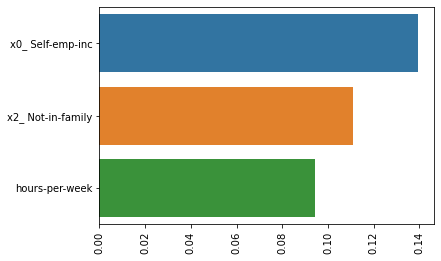

In [164]:
#code here
grid_search_results = pipe_xgb.named_steps["gridsearchcv"]
best_xgb = grid_search_results.best_estimator_
ohe_feature_names = preprocess.named_transformers_["onehotencoder"].get_feature_names().tolist()
te_features_names = preprocess.named_transformers_["targetencoder"].get_feature_names()
feature_names = ohe_feature_names + te_features_names + num_features
feat_imps = zip(feature_names, best_rf.feature_importances_)
feats,imps = zip(*(sorted(list(filter(lambda x:x[1] != 0, feat_imps)), key = lambda x: x[1], reverse = True)))
ax = sns.barplot(list(imps[:3]),list(feats[:3]))
ax.tick_params(axis = "x", rotation = 90)
## We can see that the XGBoosting has yielded the exact same results as the random forest, which validate our assumption that
## the decision tree is still overfitting even after pruning. Thus, I would trust this XGBoosting model more.

5. Can you choose the top 7 features (as given by feature importances from XGBoost) and repeat Q6.2? Does this model perform better than the one trained in Q6.2? Why or why not is the performance better?

In [179]:
#code here
import_fea = list(feats[:7])
import_fea
ohe_features2 = ["workclass","relationship","race"]
num_features2 = ["hours-per-week"]
mixed_df2 = df2[ohe_features2+num_features2]
target = df2["target"]
preprocess2 = make_column_transformer((StandardScaler(), num_features2), 
                                    (OneHotEncoder(handle_unknown = "ignore"),ohe_features2),
                                        remainder = "passthrough")
pipe_xgb = make_pipeline(preprocess2, GridSearchCV(XGBRegressor(random_state=5),
                                                    param_grid = [{'n_estimators': [100,200,300],
                                                                    'max_depth': [5,10,15],
                                                                   'learning_rate': [0.05,0.1,0.15]
                                                               }], n_jobs = -1,
                                                               return_train_score = True))
pipe_xgb.fit(X_dev[ohe_features2+num_features2],y_dev)
grid_search_results = pipe_xgb.named_steps["gridsearchcv"]

In [182]:
print(f"XGBoosting Regressor Score", pipe_xgb.score(X_test[ohe_features2+num_features2],y_test))
print(f"Best score:", grid_search_results.best_score_)
print(f"Best params:", grid_search_results.best_params_)
'''
we can see that the performance is much worse. Althought they are the most significant 7 features features ranked by the XGBoost, there could be other features also making signicant impacting on prediction, removing those features will make the prediction to be more biased and cause lower performance.
'''

XGBoosting Regressor Score 0.2492315829310452
Best score: 0.25738116489859375
Best params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}


'\nwe can see that the performance is much worse. Althought they are the most significant 7 features features ranked by the XGBoost, there could be other features also making signicant impacting on prediction, removing those features will make the prediction to be more biased and cause lower performance.\n'

### Q7: Calibration

Let's use the same dataset and the splits created in Q3. Let's use the XGBoost model that you trained in Q6.2. 

1. Estimate the brier score for the XGBoost model (trained with optimal hyperparameters from Q6.2) scored on the test dataset. 

In [14]:
#code here
from sklearn.metrics import brier_score_loss

warnings.filterwarnings('ignore')

pipe_xgb3 = make_pipeline(preprocess, xgb.XGBClassifier(random_state=5,max_depth= 5, n_estimators = 300, eta = 0.05))

pipe_xgb3.fit(X_dev,y_dev.ravel())
probs = pipe_xgb3.predict_proba(X_test)[:, 1]
print(f"brier score for the XGBoost model on test dataset is:",brier_score_loss(y_test, probs))

[19:16:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
brier score for the XGBoost model on test dataset is: 0.09139256987828727


2. Calibrate the trained XGBoost model using isotonic regression as well as Platt scaling. Plot predicted v.s. actual on test datasets from both the calibration methods

[19:24:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


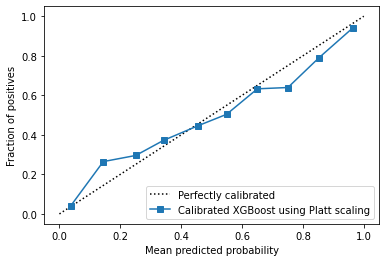

In [24]:
#code here
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import CalibrationDisplay
calibrated1 = CalibratedClassifierCV(pipe_xgb3.fit(X_dev,y_dev.ravel()), method='sigmoid', cv='prefit')
calibrated1.fit(X_dev,y_dev.ravel())
display = CalibrationDisplay.from_estimator(
    calibrated1, X_test,y_test, n_bins = 10, name = "Calibrated XGBoost using Platt scaling")

[19:25:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


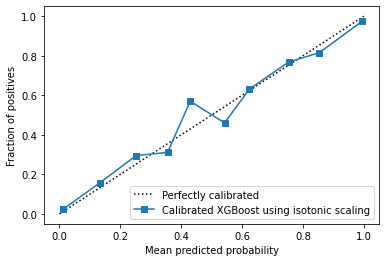

In [25]:
calibrated2 = CalibratedClassifierCV(pipe_xgb3.fit(X_dev,y_dev.ravel()), method='isotonic', cv='prefit')
calibrated2.fit(X_dev,y_dev.ravel())
display = CalibrationDisplay.from_estimator(
    calibrated2, X_test,y_test, n_bins = 10, name = "Calibrated XGBoost using isotonic scaling")

3. Report brier scores from both the calibration methods. Do the calibration methods help in having better predicted probabilities?

In [26]:
#code here
probs1 = calibrated1.predict_proba(X_test)[:, 1]
print(f"brier score after Platt scaling:",brier_score_loss(y_test, probs1))
probs2 = calibrated2.predict_proba(X_test)[:, 1]
print(f"brier score after isotonic scaling:",brier_score_loss(y_test, probs2))

brier score after Platt scaling: 0.09362977979513187
brier score after isotonic scaling: 0.0918167461551176


It seems that the calibration methods doesn't help in having better predicted probabilities mostly likely due to the XGBoost has a great calibration curve before Calibration. To prove this, I plot it as the below graph and validate the point.

[19:25:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


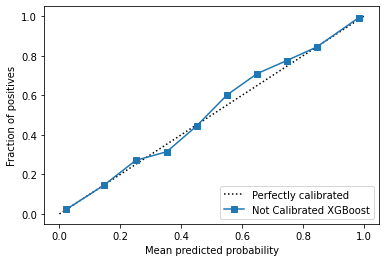

In [27]:
 CalibrationDisplay.from_estimator(
    pipe_xgb3.fit(X_dev,y_dev.ravel()), X_test,y_test, n_bins = 10, name = "Not Calibrated XGBoost")